# Association Rule Mining(ARM)

Association Rule Learning (or Associate Rule Mining) is a rule-based machine learning method to discover how items are associated to each other. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
groceries = pd.read_csv("Groceries_dataset.csv", parse_dates=["Date"])
groceries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


/tmp/ipykernel_4951/2979054683.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  groceries = pd.read_csv("Groceries_dataset.csv", parse_dates=["Date"])


In [3]:
groceries.head()

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-01-05,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-02-01,whole milk


### Exploratory Data Analysis

**Single Feature Visualization**

In [4]:
print("We have the data from",groceries.Date.min(),"to", groceries.Date.max())

We have the data from 2014-01-01 00:00:00 to 2015-12-30 00:00:00


In [5]:
groceries['year'] = groceries['Date'].dt.year
groceries['month'] = groceries['Date'].dt.month
groceries['day'] = groceries['Date'].dt.day
groceries['day_of_week'] = groceries['Date'].dt.day_name()
groceries.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,Tuesday
1,2552,2015-01-05,whole milk,2015,1,5,Monday
2,2300,2015-09-19,pip fruit,2015,9,19,Saturday
3,1187,2015-12-12,other vegetables,2015,12,12,Saturday
4,3037,2015-02-01,whole milk,2015,2,1,Sunday


Text(0, 0.5, 'Count')

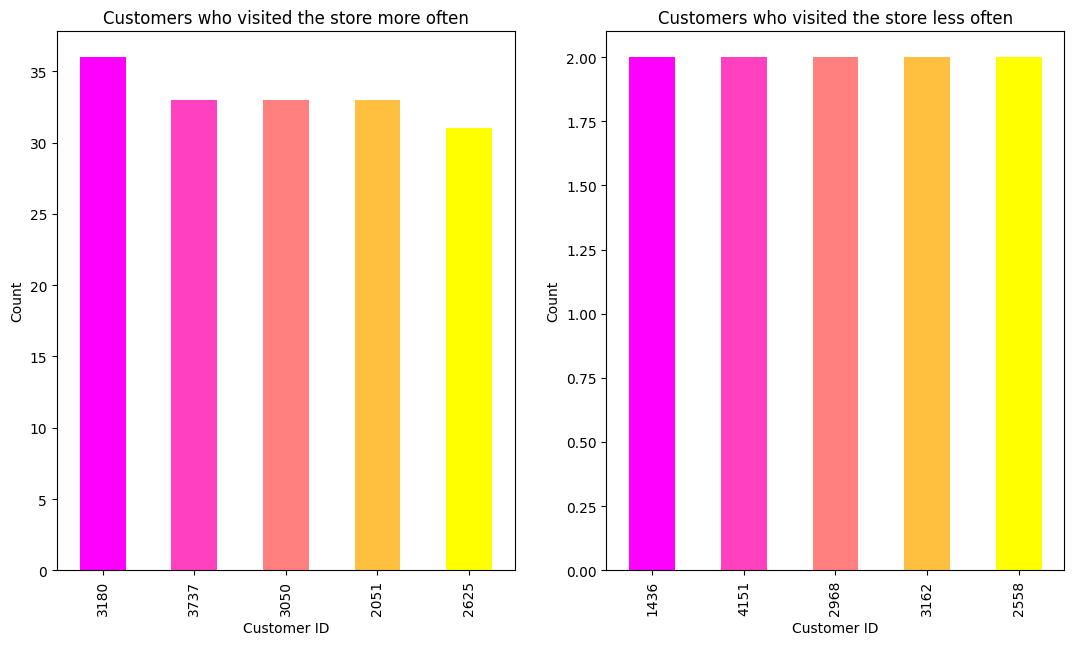

In [7]:
plt.rcParams["figure.figsize"] = [13, 7]
color = plt.cm.spring(np.linspace(0, 1, 5))
fig, (ax1, ax2) = plt.subplots(ncols = 2)

groceries["Member_number"].value_counts().head().plot(kind="bar", color=color, ax = ax1, title = "Customers who visited the store more often")

ax1.set_xlabel("Customer ID")
ax1.set_ylabel("Count")

groceries["Member_number"].value_counts(ascending=True).head().plot(kind="bar", color=color, ax = ax2, title = "Customers who visited the store less often")
ax2.set_xlabel("Customer ID")
ax2.set_ylabel("Count")


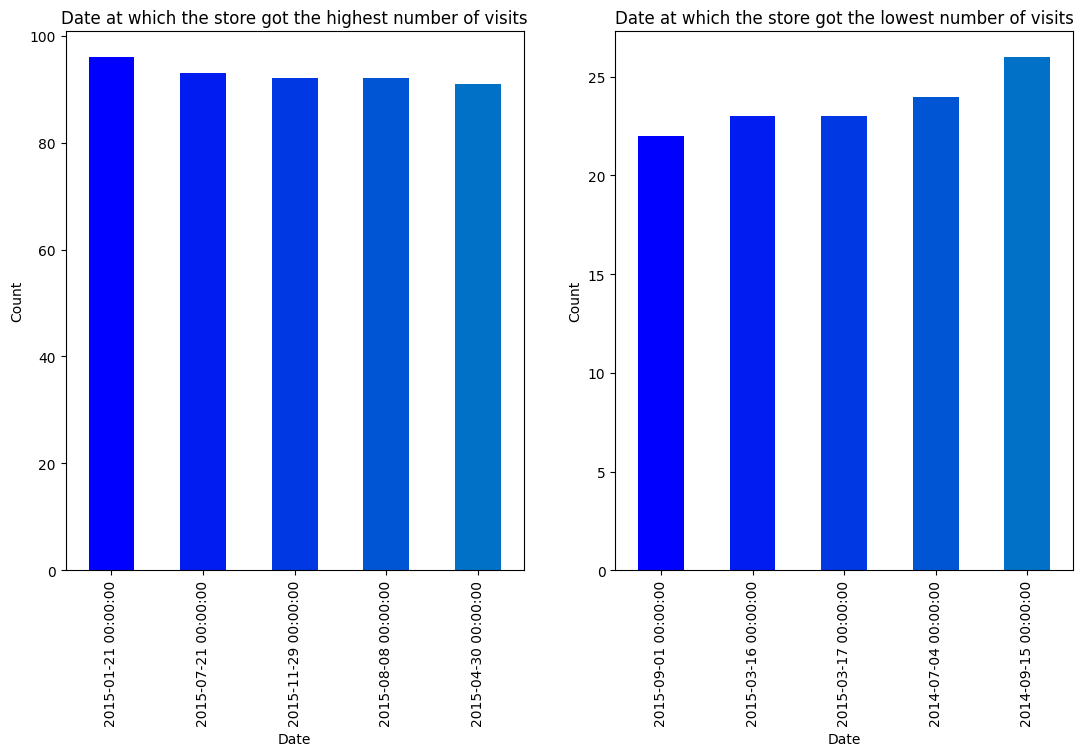

In [8]:
plt.rcParams["figure.figsize"] = [13, 7]

color = plt.cm.winter(np.linspace(0, 1, 10))

fig, (ax, ax2) = plt.subplots(ncols=2)

groceries['Date'].value_counts().head().plot(kind='bar', color = color, ax=ax, title='Date at which the store got the highest number of visits');
ax.set_xlabel("Date")
ax.set_ylabel("Count")
groceries['Date'].value_counts(ascending=True).head().plot(kind='bar', color = color, ax=ax2, title='Date at which the store got the lowest number of visits');
ax2.set_xlabel("Date")
ax2.set_ylabel("Count");

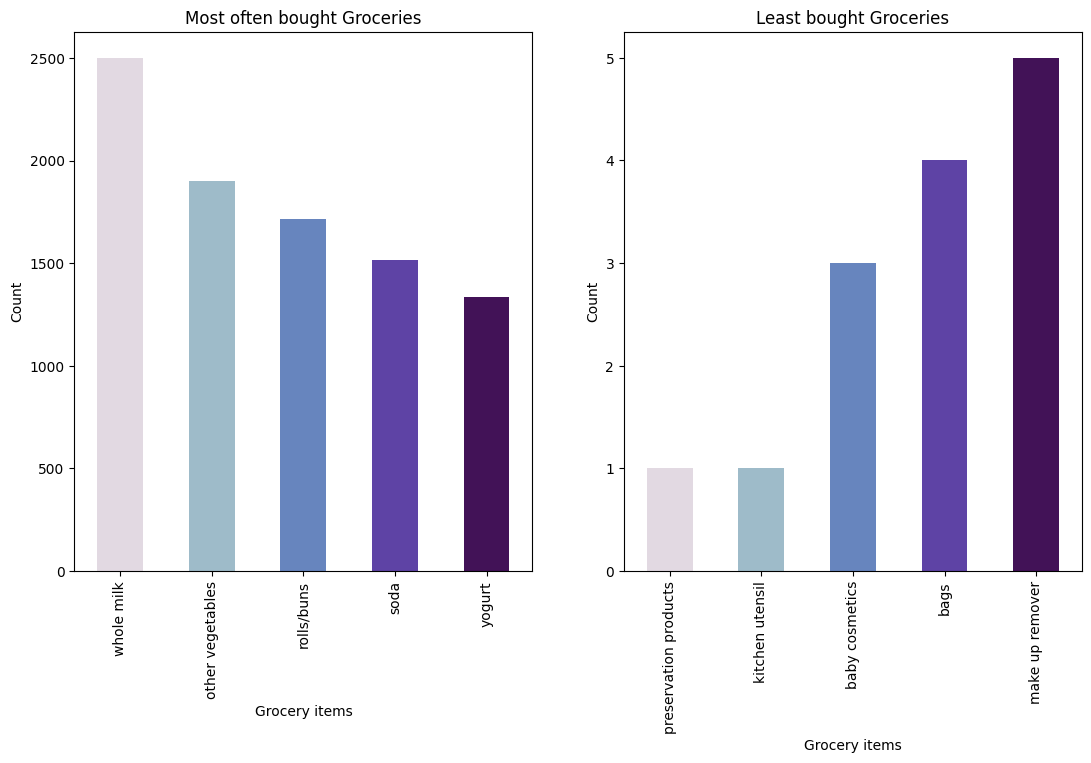

In [9]:
plt.rcParams["figure.figsize"] = [13, 7]
color = plt.cm.twilight(np.linspace(0, 1, 10))

fig, (ax, ax2) = plt.subplots(ncols=2)

groceries['itemDescription'].value_counts().head().plot(kind='bar', color = color, ax=ax, title='Most often bought Groceries');
ax.set_xlabel("Grocery items")
ax.set_ylabel("Count")
groceries['itemDescription'].value_counts(ascending=True).head().plot(kind='bar', color = color, ax=ax2, title='Least bought Groceries');
ax2.set_xlabel("Grocery items")
ax2.set_ylabel("Count");

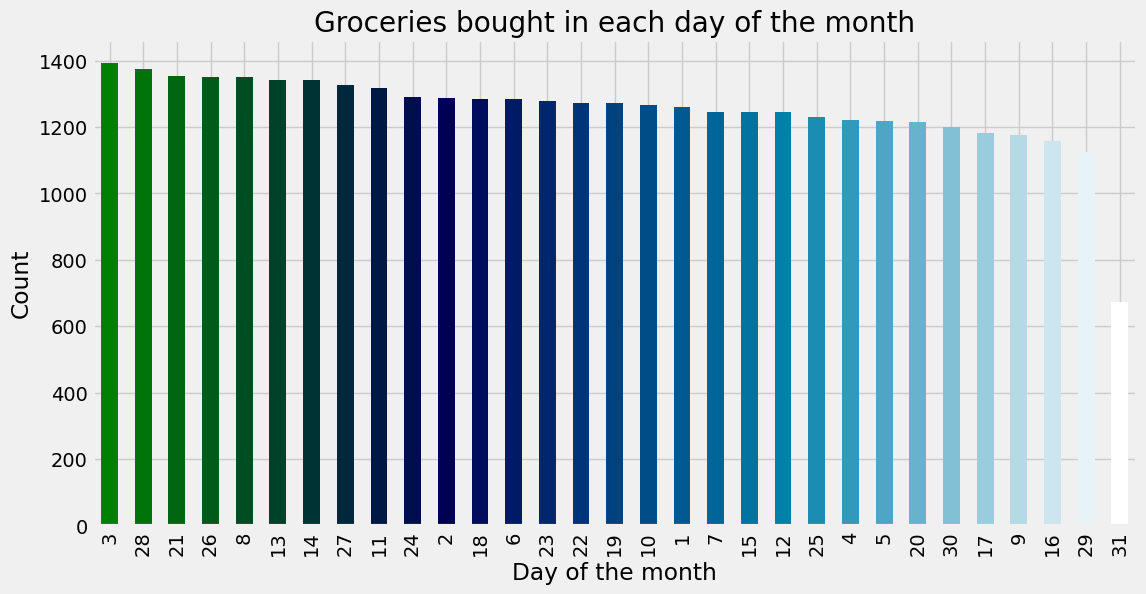

In [10]:
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [12, 6]
color = plt.cm.ocean(np.linspace(0, 1, 31))

groceries['day'].value_counts().plot(kind='bar', color=color, title='Groceries bought in each day of the month').set(xlabel='Day of the month', ylabel='Count');

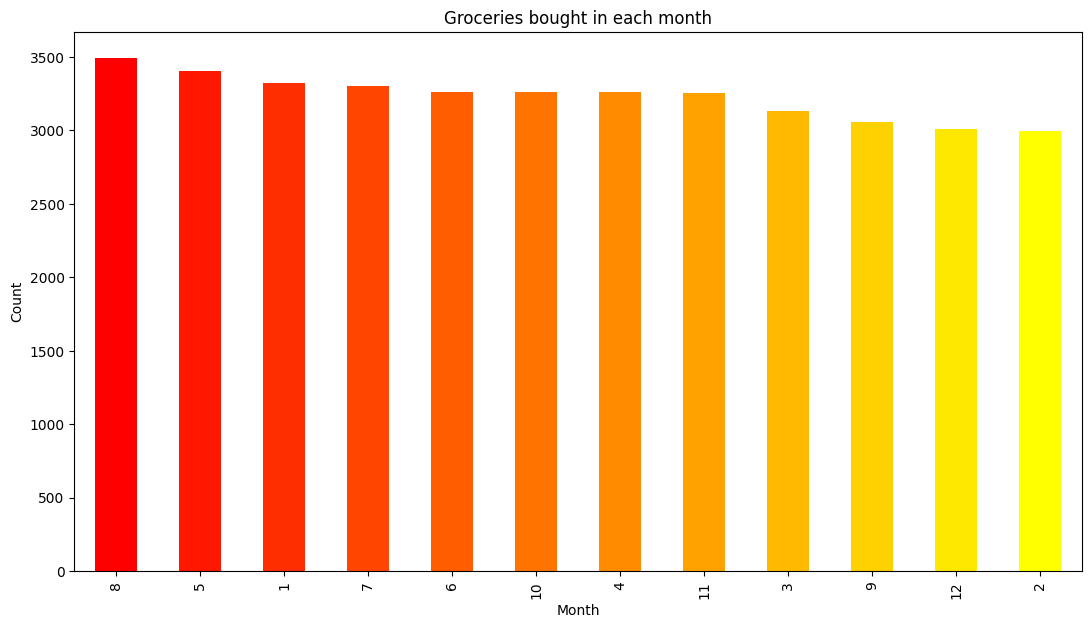

In [11]:
plt.rcdefaults()
plt.rcParams["figure.figsize"] = [13, 7]
color = plt.cm.autumn(np.linspace(0, 1, 12))

groceries['month'].value_counts().plot(kind='bar', color=color, title='Groceries bought in each month').set(xlabel='Month', ylabel='Count');

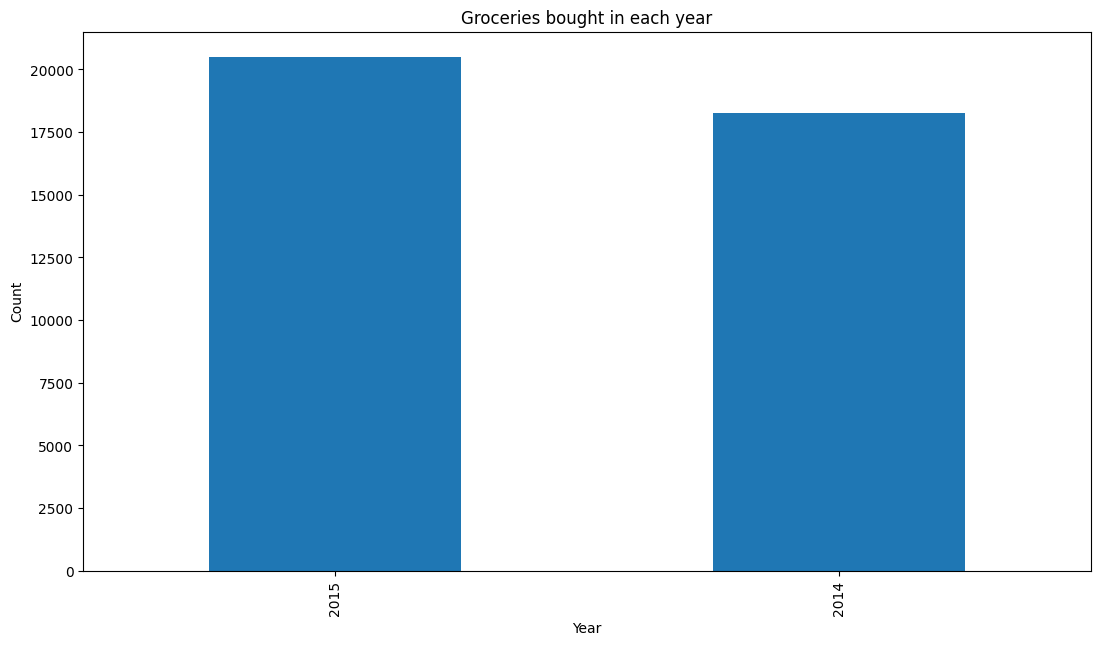

In [12]:
plt.rcdefaults()
plt.rcParams["figure.figsize"] = [13, 7]

groceries['year'].value_counts().plot(kind='bar', title='Groceries bought in each year').set(xlabel='Year', ylabel='Count');

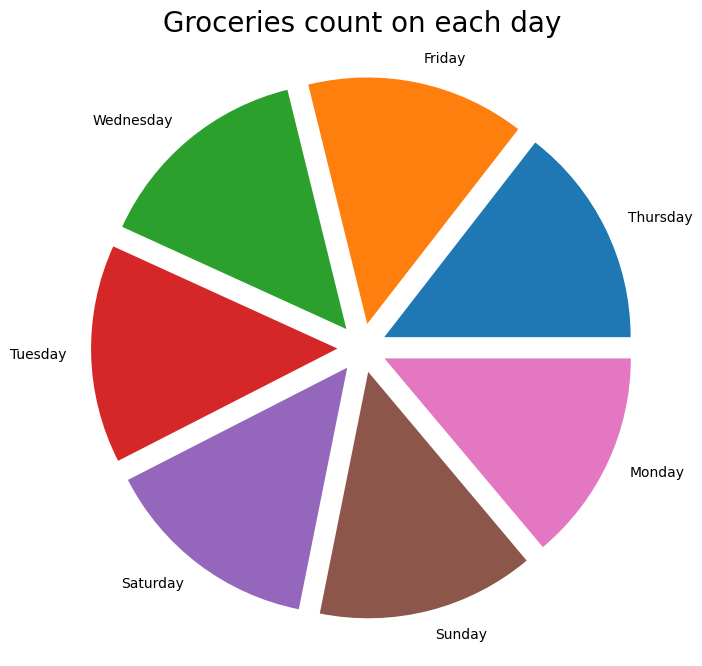

In [13]:
groceries['day_of_week'].value_counts().head(15).plot.pie(figsize = (15, 8), explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1))

plt.title('Groceries count on each day',fontsize = 20)
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation = 90)
plt.show()

- The Customer Visiting Rate is equally distributed across all the days of week.


**Multiple Feature Interactions Visualization**

In [17]:
groceries_time = pd.DataFrame(groceries.groupby('Date')['itemDescription'].nunique().index)
groceries_time['members_count'] = groceries.groupby('Date')['Member_number'].nunique().values 
groceries_time['items_count'] = groceries.groupby('Date')['itemDescription'].nunique().values 
groceries_time['items'] = groceries.groupby('Date')['itemDescription'].unique().values

In [19]:
groceries_time.set_index('Date', inplace=True)
groceries_time.head()

,members_count,items_count,items
Date,,,
2014-01-01,21,30,"[cleaner, sausage, tropical fruit, whole milk,..."
2014-01-02,25,37,"[beef, frankfurter, hamburger meat, soda, UHT-..."
2014-01-03,21,34,"[frankfurter, oil, beef, long life bakery prod..."
2014-01-04,17,31,"[ham, chocolate, instant coffee, specialty cho..."
2014-01-05,24,43,"[meat, hamburger meat, sausage, liver loaf, tr..."


/tmp/ipykernel_4951/3442051177.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = groceries_time['members_count'],shade=True);


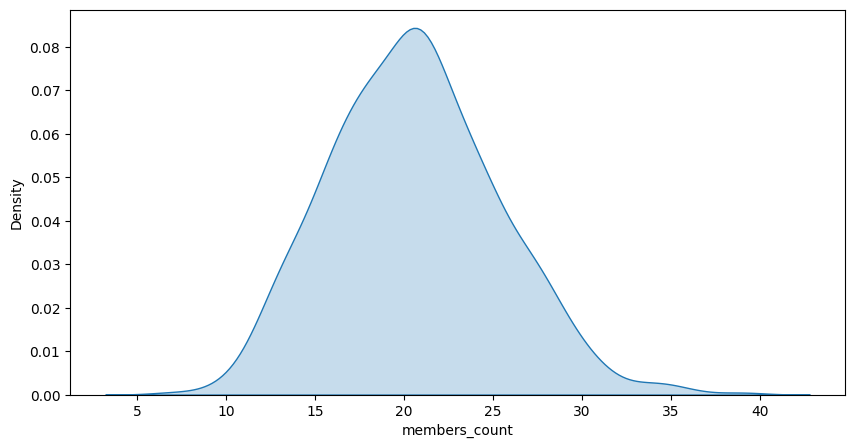

In [20]:
plt.rcParams["figure.figsize"] = [10, 5]
sns.kdeplot(data = groceries_time['members_count'],shade=True);

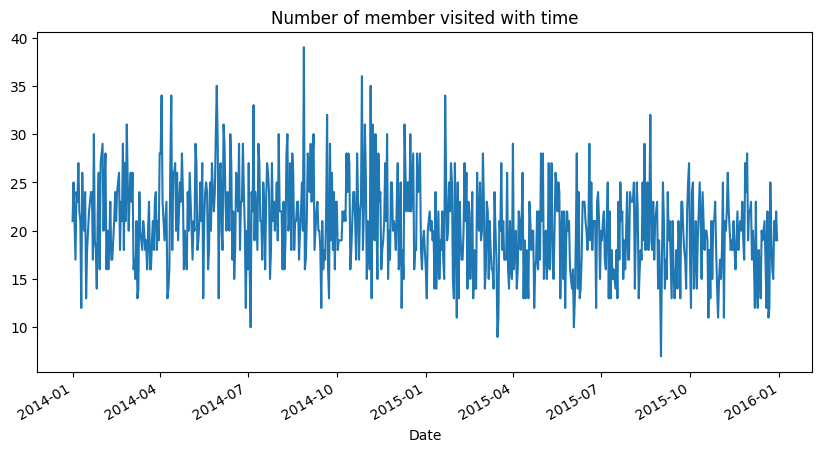

In [21]:
groceries_time['members_count'].plot(figsize=(10, 5),title='Number of member visited with time');

# Associate Rule Learning

Association rule learning is a technique to discover how items are associated to each other. Association can be measured in three common ways.

## Support

It tell us about how popular an itemset is, as measured by the proportion of transactions in which an itemset appears. It is measured as follows:

For Movie Recommendation, we calculate it as:
$$
\begin{equation*}
support(M) = \frac{\text{number of user watchlists containing M}}{\text{total number of user watchlists}}
\end{equation*}
$$

wheras for Market Basket Optimization, we calculate it as:
$$
\begin{equation*}
support(I) = \frac{\text{number of transactions containing I}}{\text{total number of transactions}}
\end{equation*}
$$

## Confidence

It tell us about how likely item B is purchased when item A is purchased, expressed as {A -> B}. It is measured as follows:

For Movie Recommendation, we calculate it as:
$$
\begin{equation*}
confidence(M_1\rightarrow{M_2}) = \frac{\text{number of user watchlists containing $M_1$ and $M_2$}}{\text{number of user watchlists containing $M_1$}}
\end{equation*}
$$

wheras for Market Basket Optimization, we calculate it as:
$$
\begin{equation*}
confidence(I_1\rightarrow{I_2}) = \frac{\text{number of transactions containing $I_1$ and $I_2$}}{\text{number of transactions containing $I_1$}}
\end{equation*}
$$

## Lift

It tell us about how likely the item B is purchased when the item A is purchased while controlling for how popular item B is. It is measured as follows:

For Movie Recommendation, we calculate it as:
$$
\begin{equation*}
lift(M_1\rightarrow{M_2}) = \frac{Confidence(M_1\rightarrow{M_2})}{Support(M_2)}
\end{equation*}
$$

wheras for Market Basket Optimization, we calculate it as:
$$
\begin{equation*}
lift(I_1\rightarrow{I_2}) = \frac{Confidence(I_1\rightarrow{I_2})}{Support(I_2)}
\end{equation*}
$$

## Apriori

Apriori algorithm consist of:

1. Step 1: Set a minimum support and confidence.
2. Step 2: Take all the subsets in transactions having higher support than minimum support.
3. Step 3: Take all the rules of these subsets having higher confidence than minimum confidence.
4. Step 4: Sort the rules by decreasing lift.

We will be using `apriori` function from `apyori` package to implement the apriori algorithm. It return all the different association measures (or the rules) such support, confidence and lift.

In [22]:
try:
    import apyori
except:
    !pip install apyori

from apyori import apriori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5955 sha256=0f0ad66f27d4ac826650881cdf836068d54f6a2d2902119df286c445c15a058f
  Stored in directory: /home/niranjan/.cache/pip/wheels/32/2a/54/10c595515f385f3726642b10c60bf788029e8f3a1323e3913a
Successfully built apyori


In [24]:
transactions = groceries_time['items'].tolist()

In [32]:
rules = apriori(transactions=transactions, min_support = 0.00030, min_confidence=0.01, min_lift=3, min_length=2, max_length=2)
results = list(rules)
results[0]

RelationRecord(items=frozenset({'baby cosmetics', 'Instant food products'}), support=0.0027472527472527475, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Instant food products'}), items_add=frozenset({'baby cosmetics'}), confidence=0.03508771929824562, lift=8.514619883040936), OrderedStatistic(items_base=frozenset({'baby cosmetics'}), items_add=frozenset({'Instant food products'}), confidence=0.6666666666666667, lift=8.514619883040936)])

In [49]:
sample_result = results[0]
print(tuple(sample_result[2][0][0])[0])
print(tuple(sample_result[2][0][1])[0])
print(sample_result[1])
print(sample_result[2][0][2])
print(sample_result[2][0][3])

[OrderedStatistic(items_base=frozenset({'Instant food products'}), items_add=frozenset({'baby cosmetics'}), confidence=0.03508771929824562, lift=8.514619883040936), OrderedStatistic(items_base=frozenset({'baby cosmetics'}), items_add=frozenset({'Instant food products'}), confidence=0.6666666666666667, lift=8.514619883040936)]
Instant food products
baby cosmetics
0.0027472527472527475
0.03508771929824562
8.514619883040936


In [50]:
sample_result[2]

[OrderedStatistic(items_base=frozenset({'Instant food products'}), items_add=frozenset({'baby cosmetics'}), confidence=0.03508771929824562, lift=8.514619883040936),
 OrderedStatistic(items_base=frozenset({'baby cosmetics'}), items_add=frozenset({'Instant food products'}), confidence=0.6666666666666667, lift=8.514619883040936)]

In [51]:
def inspect(results):
    '''
    function to put the result in well organised pandas dataframe
    '''
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))

resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Item #1', 'Item #2', 'Support', 'Confidence', 'Lift'])
resultsinDataFrame.head()

,Item #1,Item #2,Support,Confidence,Lift
0,Instant food products,baby cosmetics,0.002747,0.035088,8.514620
1,Instant food products,bags,0.001374,0.017544,3.192982
2,Instant food products,liqueur,0.004121,0.052632,4.257310
3,abrasive cleaner,cleaner,0.005495,0.181818,4.564263
4,artif. sweetener,baby cosmetics,0.001374,0.035714,8.666667


In [52]:
resultsinDataFrame.nlargest(n=10, columns='Lift')

,Item #1,Item #2,Support,Confidence,Lift
169,liqueur,preservation products,0.001374,0.111111,80.888889
160,kitchen utensil,prosecco,0.001374,1.000000,38.315789
157,kitchen utensil,male cosmetics,0.001374,1.000000,20.800000
203,preservation products,spices,0.001374,1.000000,18.666667
21,bags,frozen fruits,0.001374,0.250000,16.545455
201,preservation products,soups,0.001374,1.000000,15.826087
118,frozen chicken,organic products,0.001374,0.200000,14.560000
92,decalcifier,salad dressing,0.001374,0.111111,13.481481
113,frozen chicken,frozen fruits,0.001374,0.200000,13.236364
81,cream,frozen chicken,0.001374,0.083333,12.133333


**In the store, people bought liquer with preservation products, kitchen utensil with prosecco and preservation products with spices. The store should add deals with preservation products, kitchen utensil and frozen chicken to increase it sales.**